In [1]:
# original code from Nick Smith
from rucio.client import Client
import pandas as pd
client = Client()


In [2]:
df = pd.json_normalize(client.get_account_usage_history("crab_tape_recall", "T2_CH_CERN"))


<AxesSubplot:xlabel='updated_at'>

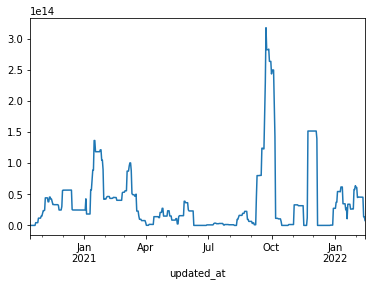

In [3]:
df.set_index(pd.to_datetime(df.updated_at)).resample("1d").bytes.last().ffill().plot()


ADDITIONS BY STEFANO

In [4]:
# a look at Rucio call output

res=client.get_account_usage_history("crab_tape_recall", "T2_CH_CERN")
import pprint
pprint.pprint(res[0:3])

[{'bytes': 0, 'files': 0, 'updated_at': '2020-10-15T20:57:45'},
 {'bytes': 4382423610681, 'files': 1454, 'updated_at': '2020-10-23T13:33:24'},
 {'bytes': 11651109678633, 'files': 2481, 'updated_at': '2020-10-27T17:10:29'}]


<AxesSubplot:xlabel='updated_at'>

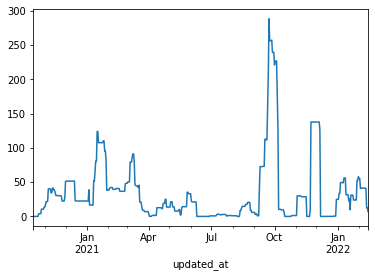

In [5]:
# now make a pandas dataframe in TB instead of bytes
By2TBy = 1./(1024.*1024.*1024.*1024.)
TBdf=df.set_index(pd.to_datetime(df.updated_at)).resample("1d").bytes.last()*By2TBy
TBdf.ffill().plot()

